In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [5]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=0)

In [6]:
X.shape

(1000, 2)

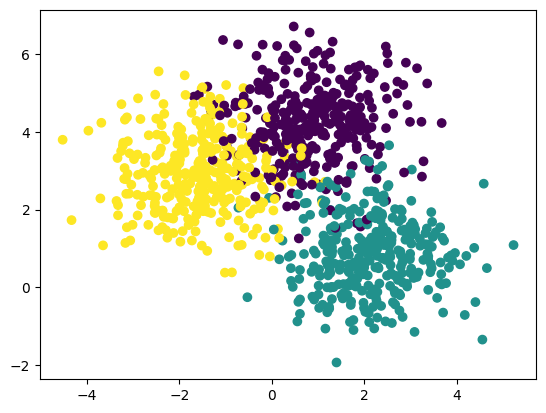

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.33 , random_state = 42)

In [11]:
from sklearn.cluster import KMeans

In [17]:
## elbow method to select the k value
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, n_init = 'auto')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [18]:
wcss

[4071.0814436818705,
 2018.0920245826744,
 1147.354742689031,
 981.7997527717628,
 808.5002255308909,
 672.7781897966722,
 590.9324255570186,
 535.0306003898925,
 449.3478745187311,
 418.5175360284828]

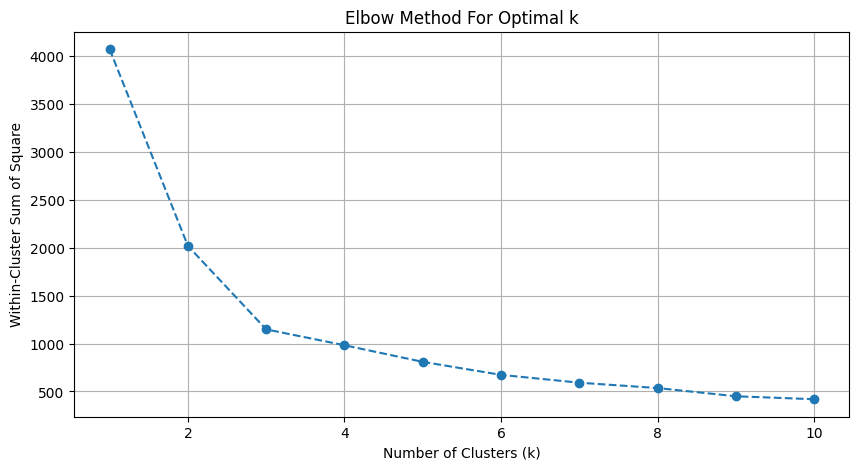

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [20]:
kmeans = KMeans(n_clusters = 3,n_init = "auto")

In [23]:
y_labels=kmeans.fit_predict(X_train)

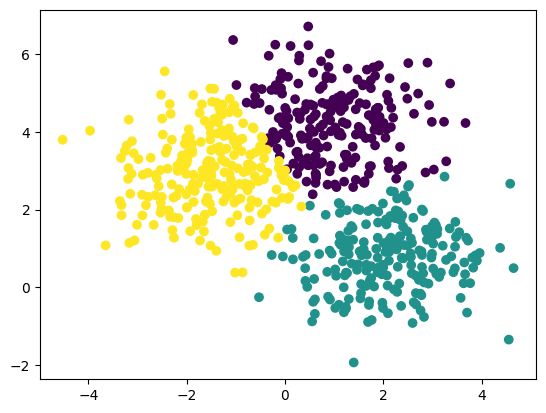

In [25]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [27]:
y_test_labels = kmeans.predict(X_test)

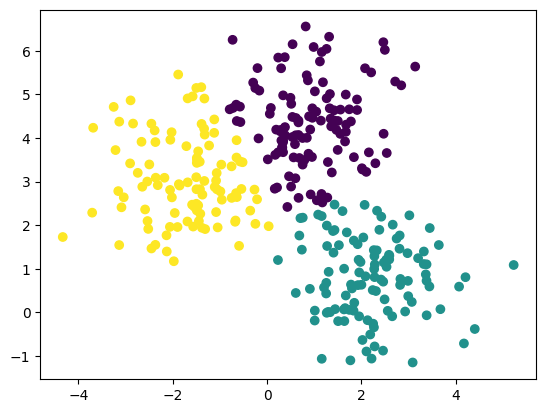

In [28]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [29]:
!pip install kneed

In [30]:
from kneed import KneeLocator

In [32]:
kl=KneeLocator(range(1,11),wcss,curve = 'convex',direction = 'decreasing')
kl.elbow

3

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
silhouette_coeff = []
for k in range(2,11):
  kmeans = KMeans(n_clusters = k, n_init = 'auto')
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_)
  silhouette_coeff.append(score)

In [37]:
silhouette_coeff

[0.4637700375561245,
 0.46821683126542407,
 0.3945106391051941,
 0.3469329772541598,
 0.36271502713256476,
 0.3479428824147034,
 0.34049974206381184,
 0.3481836407714449,
 0.34111937204869824]

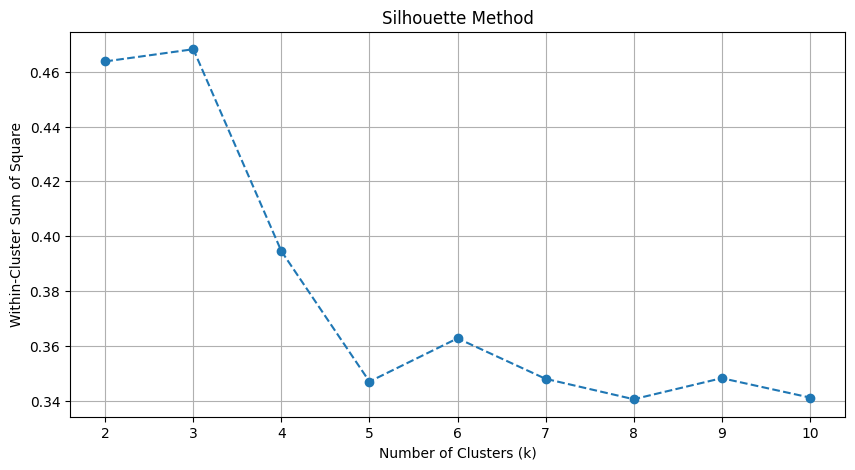

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(2, 11), silhouette_coeff, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()